In [7]:
import math
import random
import matplotlib.pyplot as plt
import torch
K = 1 # Input vector dimension

# ... (rest of the code remains the same up to the training loop)

# Global variables for A, B, C, and x
global A, B, C, x
A = [[random.random() for _ in range(K)] for _ in range(K)]
B = [[random.random() for _ in range(K)] for _ in range(K)]
C = [[random.random() for _ in range(K)] for _ in range(K)]
x = [random.random() for _ in range(K)]

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Matrix operations
def matrix_vector_multiplication(matrix, vector):
    return [sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))]

def matrix_scalar_multiplication(matrix, scalar):
    return [[matrix[i][j] * scalar for j in range(len(matrix[0]))] for i in range(len(matrix))]

def matrix_addition(matrix1, matrix2):
    return [[matrix1[i][j] + matrix2[i][j] for j in range(len(matrix1[0]))] for i in range(len(matrix1))]

# Forward propagation
def forward_propagation(x, A, B, C):
    Ax = matrix_vector_multiplication(A, x)
    Bx = matrix_vector_multiplication(B, x)
    z = [sigmoid(Ax[i] + Bx[i]) for i in range(len(Ax))]
    w = matrix_vector_multiplication(C, z)
    L = sum(w[i] * w[i] for i in range(len(w)))
    return z, w, L

# Backpropagation to compute gradients
def compute_gradients(x, A, B, C, z, w):
    gradient_A = [[2 * w[i] * C[i][j] * sigmoid_derivative(Ax + Bx) * x[j] for j in range(len(x))] for i, (Ax, Bx) in enumerate(zip(matrix_vector_multiplication(A, x), matrix_vector_multiplication(B, x)))]
    gradient_B = [[2 * w[i] * C[i][j] * sigmoid_derivative(Ax + Bx) * x[j] for j in range(len(x))] for i, (Ax, Bx) in enumerate(zip(matrix_vector_multiplication(A, x), matrix_vector_multiplication(B, x)))]
    gradient_C = [[2 * w[i] * z[j] for j in range(len(z))] for i in range(len(w))]
    return gradient_A, gradient_B, gradient_C

# Gradient descent to minimize the loss
def gradient_descent(A, B, C, gradient_A, gradient_B, gradient_C, learning_rate):
    A_new = matrix_addition(A, matrix_scalar_multiplication(gradient_A, -learning_rate))
    B_new = matrix_addition(B, matrix_scalar_multiplication(gradient_B, -learning_rate))
    C_new = matrix_addition(C, matrix_scalar_multiplication(gradient_C, -learning_rate))
    return A_new, B_new, C_new

# Generate random input vector and matrices A, B, C
random.seed(42)  # Seed for reproducibility

# A = [[random.random() for _ in range(K)] for _ in range(K)]
# B = [[random.random() for _ in range(K)] for _ in range(K)]
# C = [[random.random() for _ in range(K)] for _ in range(K)]
# x = [random.random() for _ in range(K)]

# Hyperparameters
learning_rate = 0.01
num_epochs = 50

# Training loop
A_manual = A
B_manual = B
C_manual = C
Loss_list=[]
for epoch in range(num_epochs):
    # Forward propagation
    z, w, L = forward_propagation(x, A_manual, B_manual, C_manual)

    # Backpropagation to compute gradients
    gradient_A, gradient_B, gradient_C = compute_gradients(x, A_manual, B_manual, C_manual, z, w)

    # Gradient descent to update A, B, and C
    A_manual, B_manual, C_manual = gradient_descent(A_manual, B_manual, C_manual, gradient_A, gradient_B, gradient_C, learning_rate)

    # Print the loss for every 100 epochs
    Loss_list.append(L)

# Display the optimized A, B, and C
print("Optimized A:")
print(A_manual)
print("Optimized B:")
print(B_manual)
print("Optimized C:")
print(C_manual)


Optimized A:
[[0.6377052609226974]]
Optimized B:
[[0.02328921768748067]]
Optimized C:
[[0.20597907669272122]]


Text(0, 0.5, 'loss')

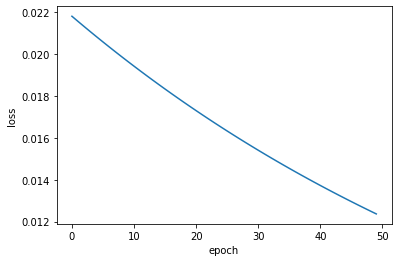

In [8]:
plt.plot(range(num_epochs),Loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')

Optimized A (Autograd):


tensor([[0.6377]], requires_grad=True)
Optimized B (Autograd):
tensor([[0.0233]], requires_grad=True)
Optimized C (Autograd):
tensor([[0.2060]], requires_grad=True)
Gradient Comparison (Manual vs. Autograd):
Gradient A (Manual):
[[0.0025575257254491055]]
Gradient A (Autograd):
tensor([[0.0026]])
Gradient B (Manual):
[[0.0025575257254491055]]
Gradient B (Autograd):
tensor([[0.0026]])
Gradient C (Manual):
[[0.11940512337823846]]
Gradient C (Autograd):
tensor([[0.1194]])


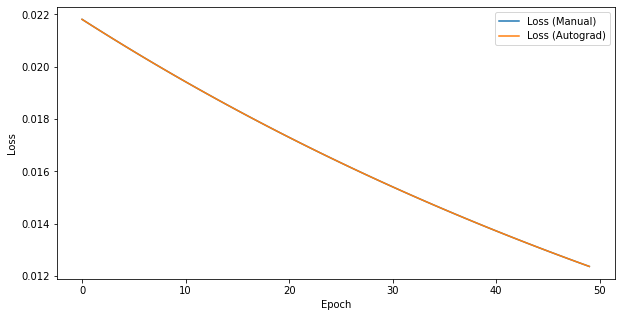

In [9]:
# Convert A, B, C, and x to PyTorch tensors
A = torch.tensor(A, requires_grad=True, dtype=torch.float32)
B = torch.tensor(B, requires_grad=True, dtype=torch.float32)
C = torch.tensor(C, requires_grad=True, dtype=torch.float32)
x = torch.tensor(x, dtype=torch.float32)

# Training loop using torch.autograd
Loss_list_autograd = []
for epoch in range(num_epochs):
    # Forward propagation using torch.autograd
    Ax = torch.matmul(A, x)
    Bx = torch.matmul(B, x)
    z = torch.sigmoid(Ax + Bx)
    w = torch.matmul(C, z)
    L = torch.sum(w ** 2)

    # Backpropagation using torch.autograd
    L.backward()

    # Extract gradients computed by torch.autograd
    gradient_A_autograd = A.grad
    gradient_B_autograd = B.grad
    gradient_C_autograd = C.grad

    # Gradient descent to update A, B, and C using torch.autograd
    with torch.no_grad():
        A -= learning_rate * gradient_A_autograd
        B -= learning_rate * gradient_B_autograd
        C -= learning_rate * gradient_C_autograd

    # Clear gradients
    A.grad = None
    B.grad = None
    C.grad = None

    # Print the loss for every 100 epochs
    Loss_list_autograd.append(L.item())

# Display the optimized A, B, and C using torch.autograd
print("Optimized A (Autograd):")
print(A)
print("Optimized B (Autograd):")
print(B)
print("Optimized C (Autograd):")
print(C)

# Compare the two sets of gradients (manual vs. autograd) and loss curves
print("Gradient Comparison (Manual vs. Autograd):")
print("Gradient A (Manual):")
print(gradient_A)
print("Gradient A (Autograd):")
print(gradient_A_autograd)

print("Gradient B (Manual):")
print(gradient_B)
print("Gradient B (Autograd):")
print(gradient_B_autograd)

print("Gradient C (Manual):")
print(gradient_C)
print("Gradient C (Autograd):")
print(gradient_C_autograd)

# Compare the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), Loss_list, label="Loss (Manual)")
plt.plot(range(num_epochs), Loss_list_autograd, label="Loss (Autograd)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()